<a href="https://colab.research.google.com/github/aozdl/interacting-with-api-python-project-tutorial/blob/main/interacting_with_api_python_project_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install spotipy
%pip install python-dotenv
%pip install pandas
%pip install seaborn
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 5.7 MB/s eta 0:00:00


dict_keys(['tracks'])
<class 'list'>
[('The Emptiness Machine', 93, 190427), ('Numb', 89, 187520), ('In the End', 88, 216880), ('Faint', 85, 162106), ('One Step Closer', 85, 157333), ("What I've Done", 84, 205226), ('Somewhere I Belong', 73, 213933), ('Crawling', 82, 208960), ('Bleed It Out', 81, 164426), ('Numb / Encore', 79, 205733)]
                Track  Popularity  Duration
6  Somewhere I Belong          73    213933
9       Numb / Encore          79    205733
8        Bleed It Out          81    164426


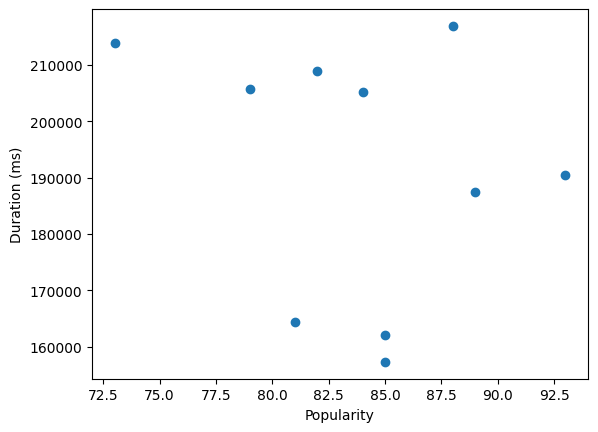

            Popularity  Duration
Popularity    1.000000 -0.230359
Duration     -0.230359  1.000000
Given the distribution of the scatter plot at the PMCC value (0.35), the conclusion is that there is very weak positive correlation between song duration and popularity


<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID ="e91d0a739d0d48408e2bf4db46b75630"
CLIENT_SECRET ="e7d924981f0047e39e39d8f5428321ca"
client_credentials_manager=SpotifyClientCredentials(client_id = CLIENT_ID, client_secret = CLIENT_SECRET)
connection = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

print(connection)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
result = sp.artist_top_tracks("6XyY86QOPPrYVGvF9ch6wz")
print(result.keys())

print(type(result["tracks"]))
tracks = result["tracks"][0:10]
#print(tracks)
sub_tracks = [(d["name"],d["popularity"],d["duration_ms"]) for d in tracks]
print(sub_tracks)
columns = ["Track", "Popularity", "Duration"]

df = pd.DataFrame(sub_tracks,columns=columns)
df_sorted = df.sort_values(by="Popularity")
print(df_sorted.head(3))

x_vals = df.Popularity
y_vals = df.Duration

plt.scatter(x_vals,y_vals)
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")
plt.show()
plt.savefig("Scatter.jpg",dpi = 300)
# only include numeric columns for correlation calculation
corr = df[["Popularity", "Duration"]].corr()
print(corr)
print("Given the distribution of the scatter plot at the PMCC value (0.35), the conclusion is that there is very weak positive correlation between song duration and popularity")


